
    Problem: e.g., Zodiac symbols are important for many users, but some users don’t add them in.
    How ML will be used: e.g., Let’s see if there are important variables that can predict a user’s zodiac signs so we can guess the missing zodiacs when we make matches.


In [220]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [143]:
#print(df.head())
df = pd.read_csv('profiles.csv')

#Replacing missing values in the body type column with unknown as not to make assumptions about peoples body type or reasons
#as to why they didn't want to reveal it

df['body_type'] = df['body_type'].fillna('Unknown')

#using kneighbors to fill in missing attributes on diet

#changing Null values from drinking to the majority 'socially'
df['drinks'] = df['drinks'].fillna('socially')

#changing null values in drug usage to unknown
df['drugs'] = df['drugs'].fillna('Unknown')

#grouping education category from 30 different unique values to 9 groups 
education_mapping = {
    'graduated from high school': 'High School',
    'working on high school': 'High School',
    'dropped out of high school': 'High School',
    
    'college/university': 'College/University',
    'graduated from college/university': 'College/University',
    'working on college/university': 'College/University',
    'dropped out of college/university': 'College/University',
    
    'graduated from masters program': 'Masters Program',
    'working on masters program': 'Masters Program',
    'dropped out of masters program': 'Masters Program',
    
    'graduated from ph.d program': 'Ph.D. Program',
    'working on ph.d program': 'Ph.D. Program',
    'dropped out of ph.d program': 'Ph.D. Program',
    
    'graduated from law school': 'Law School',
    'working on law school': 'Law School',
    'dropped out of law school': 'Law School',
    
    'graduated from med school': 'Med School',
    'working on med school': 'Med School',
    'dropped out of med school': 'Med School',
    
    'graduated from two-year college': 'Two-Year College',
    'working on two-year college': 'Two-Year College',
    'dropped out of two-year college': 'Two-Year College',
    
    'graduated from space camp': 'Space Camp',
    'working on space camp': 'Space Camp',
    'dropped out of space camp': 'Space Camp',
}

# Apply the mapping to create a new 'education_grouped' column
df['education_grouped'] = df['education'].map(education_mapping)

# For any other values not covered in the mapping, assign them to 'Other'
df['education_grouped'].fillna('Other', inplace=True)

#grouping children choices
offspring_mapping = {'doesn&rsquo;t have kids' : 'No kids', 
                     'doesn&rsquo;t have kids, and doesn&rsquo;t want any' : 'No kids',
                     'doesn&rsquo;t want kids' : 'No kids',
                     
                     'doesn&rsquo;t have kids, but might want them' :'No kids, but wants',
                     'doesn&rsquo;t have kids, but wants them' : 'No kids, but wants',
                     'wants kids' : 'No kids, but wants',
                     'might want kids' : 'No kids, but wants',
                     
                     
                     'has kids' :'Has children',
                     'has a kid' : 'Has children',
                     
                     'has a kid, and might want more' : 'Has kids, wants more',
                     'has kids, and might want more' : 'Has kids, wants more',
                     'has a kid, and wants more' : 'Has kids, wants more',
                     'has kids, and wants more ' : 'Has kids, wants more',
                     
                     'has kids, but doesn&rsquo;t want more' : 'Has kids, doesnt want more',
                     'has a kid, but doesn&rsquo;t want more' : 'Has kids, doesnt want more'                 
                     
                    }
# Apply the mapping to create a new 'offspring_grouped' column

df['offspring_grouped'] = df['offspring'].map(offspring_mapping)
# For any other values not covered in the mapping, assign them to 'Other'

df['offspring_grouped'].fillna('Other', inplace=True)


#Orientation column has no null nor unkown values

#grouping pet preference into a new column
# Create a mapping dictionary for the pet preferences
pet_mapping = {
    'likes dogs and likes cats': 'Likes Both',
    'likes dogs': 'Likes Dogs',
    'likes dogs and has cats': 'Has Cats',
    'has dogs': 'Has Dogs',
    'has dogs and likes cats': 'Has Dogs',
    'likes dogs and dislikes cats': 'Likes Dogs and Dislikes Cats',
    'has dogs and has cats': 'Has Dogs and Has Cats',
    'has cats': 'Has Cats',
    'likes cats': 'Likes Cats',
    'has dogs and dislikes cats': 'Has Dogs and Dislikes Cats',
    'dislikes dogs and likes cats': 'Dislikes Dogs',
    'dislikes dogs and dislikes cats': 'Dislikes Pets',
    'dislikes cats': 'Dislikes Cats',
    'dislikes dogs and has cats': 'Dislikes Dogs and Has Cats',
    'dislikes dogs': 'Dislikes Dogs',
    
}

# Apply the mapping to create a new 'pet_preference' column
df['pet_preference'] = df['pets'].map(pet_mapping)

# For any other values not covered in the mapping, assign them to 'Other'
df['pet_preference'].fillna('Other', inplace=True)

#grouping religion into each religion and wether or not they are serious about it


religion_mapping = {
    'agnosticism' : 'agnosticism not serious',
    'agnosticism but not too serious about it':'agnosticism not serious',
    'agnosticism and laughing about it':'agnosticism not serious',
    
    'agnosticism and very serious about it ':'agnosticism serious',
    'agnosticism and somewhat serious about it':'agnosticism serious',
    
    'catholicism but not too serious about it': 'catholicism not serious',
    'catholicism': 'catholicism not serious',
    'catholicism and laughing about it': 'catholicism not serious',
    
    'catholicism and somewhat serious about it': 'catholicism serious',
    'catholicism and very serious about it': 'catholicism serious',
    
    'christianity but not too serious about it': 'christianity not serious',
    'christianity': 'christianity not serious',
    'christianity and laughing about it': 'christianity not serious',
    
    'christianity and somewhat serious about it': 'christianity serious',
    'christianity and very serious about it': 'christianity serious',
    
    'judaism but not too serious about it': 'judaism not serious',
    'judaism': 'judaism not serious',
    'judaism and laughing about it': 'judaism not serious',
    
    'judaism and somewhat serious about it': 'judaism serious',
    'judaism and very serious about it': 'judaism serious',
    
    'islam but not too serious about it': 'islam not serious',
    'islam': 'islam not serious',
    'islam and laughing about it': 'islam not serious',
    
    'islam and somewhat serious about it': 'islam serious',
    'islam and very serious about it': 'islam serious',
    
    'buddhism but not too serious about it': 'buddhism not serious',
    'buddhism': 'buddhism not serious',
    'buddhism and laughing about it': 'buddhism not serious',
    
    'buddhism and somewhat serious about it': 'buddhism serious',
    'buddhism and very serious about it': 'buddhism serious',
    
    'hinduism but not too serious about it': 'hinduism not serious',
    'hinduism': 'hinduism not serious',
    'hinduism and laughing about it': 'hinduism not serious',
    
    'hinduism and somewhat serious about it': 'hinduism serious',
    'hinduism and very serious about it': 'hinduism serious',
    
    'atheism but not too serious about it': 'atheism not serious',
    'atheism': 'atheism not serious',
    'atheism and laughing about it': 'atheism not serious',
    
    'atheism and somewhat serious about it': 'atheism serious',
    'atheism and very serious about it': 'atheism serious',
    
    'other but not too serious about it': 'other not serious',
    'other': 'other not serious',
    'other and laughing about it': 'other not serious',
    
    'other and somewhat serious about it': 'other serious',
    'other and very serious about it': 'other serious'
    }

# Apply the mapping to create a new 'pet_preference' column
df['religion_grouped'] = df['religion'].map(religion_mapping)
# For any other values not covered in the mapping, assign them to 'Other'
df['religion_grouped'].fillna('Unkown', inplace=True)
#sex/gender doesn't need to change


#mapping sign and wether it matters a lot
sign_mapping = {
    'gemini and it&rsquo;s fun to think about': 'Gemini',
    'scorpio and it&rsquo;s fun to think about': 'Scorpio',
    'leo and it&rsquo;s fun to think about': 'Leo',
    'libra and it&rsquo;s fun to think about': 'Libra',
    'taurus and it&rsquo;s fun to think about': 'Taurus',
    'cancer and it&rsquo;s fun to think about': 'Cancer',
    'pisces and it&rsquo;s fun to think about': 'Pisces',
    'sagittarius and it&rsquo;s fun to think about': 'Sagittarius',
    'virgo and it&rsquo;s fun to think about': 'Virgo',
    'aries and it&rsquo;s fun to think about': 'Aries',
    'aquarius and it&rsquo;s fun to think about': 'Aquarius',
    'virgo but it doesn&rsquo;t matter': 'Virgo',
    'leo but it doesn&rsquo;t matter': 'Leo',
    'cancer but it doesn&rsquo;t matter': 'Cancer',
    'gemini but it doesn&rsquo;t matter': 'Gemini',
    'taurus but it doesn&rsquo;t matter': 'Taurus',
    'aquarius but it doesn&rsquo;t matter': 'Aquarius',
    'libra but it doesn&rsquo;t matter': 'Libra',
    'capricorn and it&rsquo;s fun to think about': 'Capricorn',
    'sagittarius but it doesn&rsquo;t matter': 'Sagittarius',
    'aries but it doesn&rsquo;t matter': 'Aries',
    'capricorn but it doesn&rsquo;t matter': 'Capricorn',
    'pisces but it doesn&rsquo;t matter': 'Pisces',
    'scorpio but it doesn&rsquo;t matter': 'Scorpio',
    'leo': 'Leo',
    'libra': 'Libra',
    'cancer': 'Cancer',
    'virgo': 'Virgo',
    'scorpio': 'Scorpio',
    'gemini': 'Gemini',
    'taurus': 'Taurus',
    'aries': 'Aries',
    'pisces': 'Pisces',
    'aquarius': 'Aquarius',
    'sagittarius': 'Sagittarius',
    'capricorn': 'Capricorn',
    'scorpio and it matters a lot': 'Scorpio',
    'leo and it matters a lot': 'Leo',
    'cancer and it matters a lot': 'Cancer',
    'aquarius and it matters a lot': 'Aquarius',
    'pisces and it matters a lot': 'Pisces',
    'gemini and it matters a lot': 'Gemini',
    'libra and it matters a lot': 'Libra',
    'taurus and it matters a lot': 'Taurus',
    'aries and it matters a lot': 'Aries',
    'sagittarius and it matters a lot': 'Sagittarius',
    'capricorn and it matters a lot': 'Capricorn',
    'virgo and it matters a lot': 'Virgo'
}

# Apply the mapping to create a new 'sign_transformed' column
df['sign_grouped'] = df['sign'].map(sign_mapping)


#applying unkwnown to null values in smoking

df['smokes'].fillna('Unknown', inplace=True)

#Speaks has 7668 unique answers, best not to use it

#Height has 24 values that are below 48 inches, 4 feet, replaced them with the mean value for heights
median_height = df['height'].median()
df['height'] = df['height'].apply(lambda x: median_height if x < 48 else x)
df['height'].fillna(median_height, inplace=True)

#replace nun vallues in jobs with 'unknown'
df['job'].fillna('Unknown', inplace=True)

#replace nun vallues in diet with 'unknown'

df['diet'].fillna('Unknown', inplace=True)

#Finished transformation of every column, education, offspring, pet preference, religion and sign were grouped into a new
#column
print(df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status',
       'education_grouped', 'offspring_grouped', 'pet_preference',
       'religion_grouped', 'sign_grouped'],
      dtype='object')


Data has 59946 entries trough 31 columns, including common topics on dating apps such as body type, diet, if a person drinks, smokes or uses drugs, education level, ethnicity, height, income, job, if they want kids, sexual orientation, if they have pets, their religion, gender, zodiac sign, language they speak and current relationship status.
There are also 9 essays, their self summary, what they are currently doing, what they are good at, favorite pieces of media, things they can't live without, typical friday activities and a reason someone might be interested and message them.


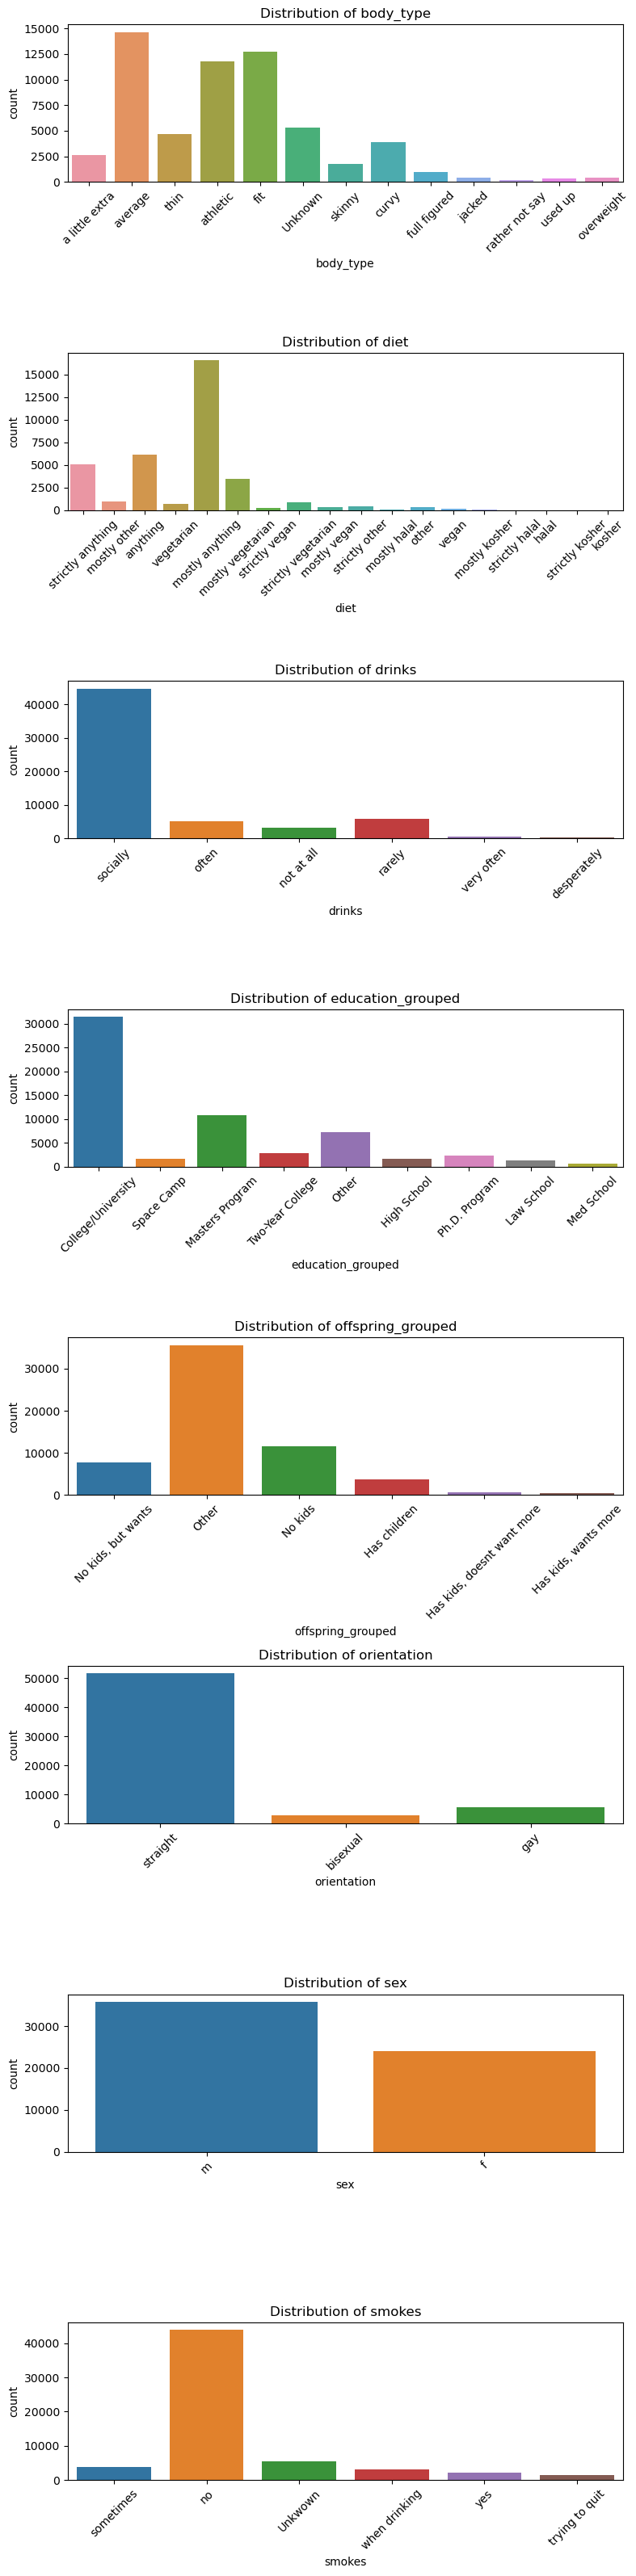

In [105]:
# List of categorical columns you want to visualize
categorical_columns = ['body_type', 'diet', 'drinks', 'education_grouped', 'offspring_grouped','orientation', 'sex','smokes']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(8, 4 * len(categorical_columns)))

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    # Create a countplot
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [168]:
label_encoder = LabelEncoder()
scaler = StandardScaler()
#creating a dataframe with only columns that will be used for different machine learnings

df2 = df[['age', 'body_type', 'diet', 'drinks', 'drugs', 'education_grouped','height','job','offspring_grouped',
            'orientation', 'pet_preference', 'religion_grouped', 'sign_grouped', 'sex', 'smokes', 'status']].copy()

#label encode all variables that need it
encoded_columns = ['body_type', 'diet', 'drinks', 'drugs', 'education_grouped','job','offspring_grouped',
            'orientation', 'pet_preference', 'religion_grouped', 'sign_grouped', 'sex', 'smokes', 'status' ]

#dictionary for each label:
label_mappings = {}


for column in encoded_columns:
    df2[column] = label_encoder.fit_transform(df2[column])
# Store the mapping in the dictionary
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    
df2['age'] = scaler.fit_transform(df2['age'].values.reshape(-1, 1))
df2['height'] = scaler.fit_transform(df2['height'].values.reshape(-1, 1))


print(df2.head())
print(df2.sign_grouped.value_counts())
print(label_mappings['sign_grouped'])

        age  body_type  diet  drinks  drugs  education_grouped    height  job  \
0 -1.093898          1    11       4      1                  0  1.712194   20   
1  0.281370          3     7       2      3                  7  0.432378    9   
2  0.598740         11     1       4      0                  3 -0.079548    0   
3 -0.988108         11    18       4      0                  0  0.688342   19   
4 -0.353369          2     0       4      1                  0 -0.591475    1   

   offspring_grouped  orientation  pet_preference  religion_grouped  \
0                  4            2               8                 0   
1                  4            2               8                 1   
2                  5            2               4                 0   
3                  3            2               9                 0   
4                  5            2               8                 0   

   sign_grouped  sex  smokes  status  
0             4    1       2       3  
1       

In [172]:
#let's try and see if it is possible to predict peoples zodiag signs
df2 = df2[df2['sign_grouped'] != 12]

# Separate features (x) and target variable (y)
x = df2.drop('sign_grouped', axis=1)
y = df2.sign_grouped

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

# Define the range of hyperparameter values to search over
parameters = {'n_neighbors': range(1, 21)}

# Create a KNeighborsClassifier instance
classifier = KNeighborsClassifier()

# Use GridSearchCV to perform a search over the specified parameter values
grid_search = GridSearchCV(classifier, parameters, cv=10)

# Fit the model to the training data, trying all possible combinations of hyperparameter values
grid_search.fit(x_train, y_train)

# Print the best number of neighbors found during the grid search
print("Best Number of Neighbors:", grid_search.best_params_)

# Access the best model (estimator) found during the grid search
best_knn = grid_search.best_estimator_

Best Number of Neighbors: {'n_neighbors': 13}


In [179]:
# Create a KNeighborsClassifier instance with a specific number of neighbors 
knn = KNeighborsClassifier(n_neighbors=13)

# Fit the KNN model to the training data
knn.fit(x_train, y_train)

# Print the accuracy score on the test set
accuracy = knn.score(x_test, y_test)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.08304356719165473


In [176]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=99)

# Fit the model to the training data
rf_classifier.fit(x_train, y_train)

# Evaluate the accuracy on the test set
accuracy_rf = rf_classifier.score(x_test, y_test)
print("Random Forest Accuracy:", accuracy_rf)
#only slightly better with an 8.5% accuracy


Random Forest Accuracy: 0.08519124565350787


In [221]:
#now can we predict what a persons zodiac sign is by how they write their bio??
essay = df[['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7','essay8', 'essay9', 'sign_grouped']].copy()
essay = essay.dropna(subset=['sign_grouped'])

essays = essay.drop('sign_grouped', axis=1)
signs = essay.sign_grouped

essays['combined_essays'] = essays.iloc[:, :10].apply(lambda row: ' '.join(row.dropna()), axis=1)


essays_train, essays_test, signs_train, signs_test = train_test_split(essays['combined_essays'], signs, test_size=0.2, random_state=99)


vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(essays_train)
X_test = vectorizer.transform(essays_test)

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the model to the training data
nb_classifier.fit(X_train, signs_train)

# Predict the zodiac signs on the test set
predictions = nb_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(signs_test, predictions)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 0.09050930660666803


(48890, 11)
